#### Notebook header

Title: 01 – Data Preprocessing
Goal: Load raw Excel cycling files, standardize columns/time, assign cell_id, and produce a clean time-ordered dataset for downstream modeling.
Input: data/LR1865SZ*.xlsx
Output:
data/processed/cycle_features.csv 

#### Imports + config (paths)

In [1]:
import sys
import pandas as pd
import numpy as np
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.insert(0, str(PROJECT_ROOT))

from src.preprocessing import *

RAW_GLOB = "../data/LR1865SZ*.xlsx"
OUT_DIR = Path("../data")

#### Preprocessing

In [2]:
df = load_and_preprocess(RAW_GLOB)
df.head()


Loading: ../data\LR1865SZ_cycles201214_002_4.xlsx
Loading: ../data\LR1865SZ_cycles201217_001_2.xlsx


,Data_Point,Test_Time(s),Current(A),Capacity(Ah),Voltage(V),Energy(Wh),Temperature(℃),Date_Time,Cycle_Index,cell_id,Source_File,Test_Time_sec,Cycle_Index_Global
0,1,00:00:00,0.0,0.0,4.1902,0.0,NaN,2020-12-14 10:16:16,1,Cell_1,../data\LR1865SZ_cycles201214_002_4.xlsx,0.0,0
1,2,00:00:01,0.0,0.0,4.1902,0.0,NaN,2020-12-14 10:16:18,1,Cell_1,../data\LR1865SZ_cycles201214_002_4.xlsx,1.0,0
2,3,00:00:02,0.0,0.0,4.1893,0.0,NaN,2020-12-14 10:16:19,1,Cell_1,../data\LR1865SZ_cycles201214_002_4.xlsx,2.0,0
3,4,00:00:04,0.0,0.0,4.1905,0.0,NaN,2020-12-14 10:16:20,1,Cell_1,../data\LR1865SZ_cycles201214_002_4.xlsx,4.0,0
4,5,00:00:05,0.0,0.0,4.1902,0.0,NaN,2020-12-14 10:16:21,1,Cell_1,../data\LR1865SZ_cycles201214_002_4.xlsx,5.0,0


#### Saving the CSV files

In [3]:
# Also okay: CSV
df.to_csv(OUT_DIR / "clean_rows.csv", index=False)

print("Saved:", OUT_DIR / "clean_rows.csv")


Saved: ..\data\clean_rows.csv


In [4]:
print("Rows:", len(df))
print("Cells:", df["cell_id"].nunique())
print(df["cell_id"].value_counts())
df.dtypes


Rows: 329164
Cells: 2
cell_id
Cell_1    202516
Cell_2    126648
Name: count, dtype: int64


Data_Point                     int64
Test_Time(s)                  object
Current(A)                   float64
Capacity(Ah)                 float64
Voltage(V)                   float64
Energy(Wh)                   float64
Temperature(℃)               float64
Date_Time             datetime64[ns]
Cycle_Index                    int32
cell_id                       object
Source_File                   object
Test_Time_sec                float64
Cycle_Index_Global             int32
dtype: object

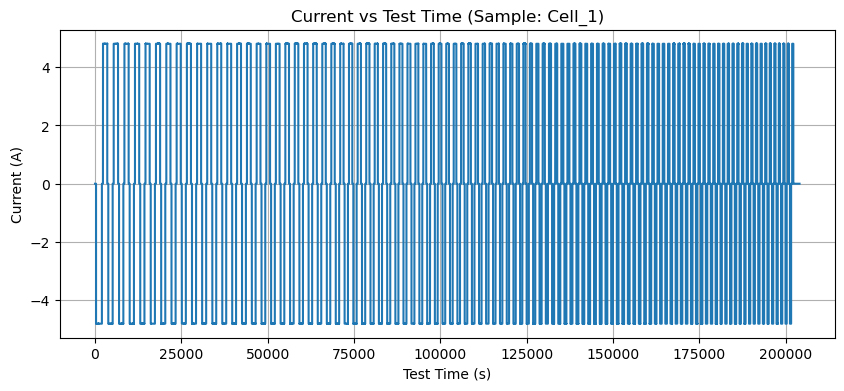

In [5]:
import matplotlib.pyplot as plt

sample_cell = df["cell_id"].unique()[0]
g = df[df["cell_id"] == sample_cell].sort_values(["Date_Time", "Test_Time_sec"])

# Update 'current_col' if you expose it from preprocessing or store a canonical column name
current_col = [c for c in df.columns if "curr" in c.lower()][0]

plt.figure(figsize=(10,4))
plt.plot(g["Test_Time_sec"], g[current_col])
plt.title(f"Current vs Test Time (Sample: {sample_cell})")
plt.xlabel("Test Time (s)")
plt.ylabel("Current (A)")
plt.grid(True)
plt.show()
